In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kalman import kalman_filter

# 背景

假定有一个匀速运动的人，状态变量x1和x2，Xx1表示人的位置，x2表示人的速度，观测变量z1和z2，z1表示人的位置，z2表示人的速度。  

状态转移方程如下：  

        速度：x2[k] = x2[k-1] + w2[k-1]  
        位置：x1[k] = x1[k-1] + x2[k-1] * dt + w1[k-1]

测量方程为：

        速度：z2[k] = x2[k] + v2[k]  
        位置：z1[k] = x1[k] + v1[k]

# 1、读取数据

In [15]:
df = pd.read_csv('data.csv', index_col=0)
x = df[['X1', 'X2']].values
z = df[['Z1', 'Z2']].values
df.head(5)

,X1,X2,Z1,Z2
Step,,,,
0,0.000000,1.000000,NaN,NaN
1,1.129616,0.408033,0.586376,1.090990
2,1.872644,0.399936,2.847231,1.521089
3,2.298644,0.466482,3.628770,0.313143
4,2.606156,0.509984,2.270175,0.762012


# 2、设置参数并调用卡尔曼滤波函数

In [16]:
u = np.zeros(z.shape)  # 控制量，当前场景为0
x_hat_first = np.array([[0, 1]])  # 初始估计
P_first = np.array([[1, 0], [0, 1]])  # 初始估计协方差

A = np.array([[1, 1], [0, 1]])  # 状态转移矩阵
B = np.array([[0, 0], [0, 0]])  # 控制矩阵
H = np.array([[1, 0], [0, 1]])  # 观测矩阵
Q = np.array([[0.1, 0], [0, 0.1]])   # 系统噪声协方差矩阵
R = np.array([[1, 0], [0, 1]])  # 测量噪声协方差矩阵

x_hat = kalman_filter(x, z, u, A, B, H, Q, R, x_hat_first, P_first)

# 3、结果展示

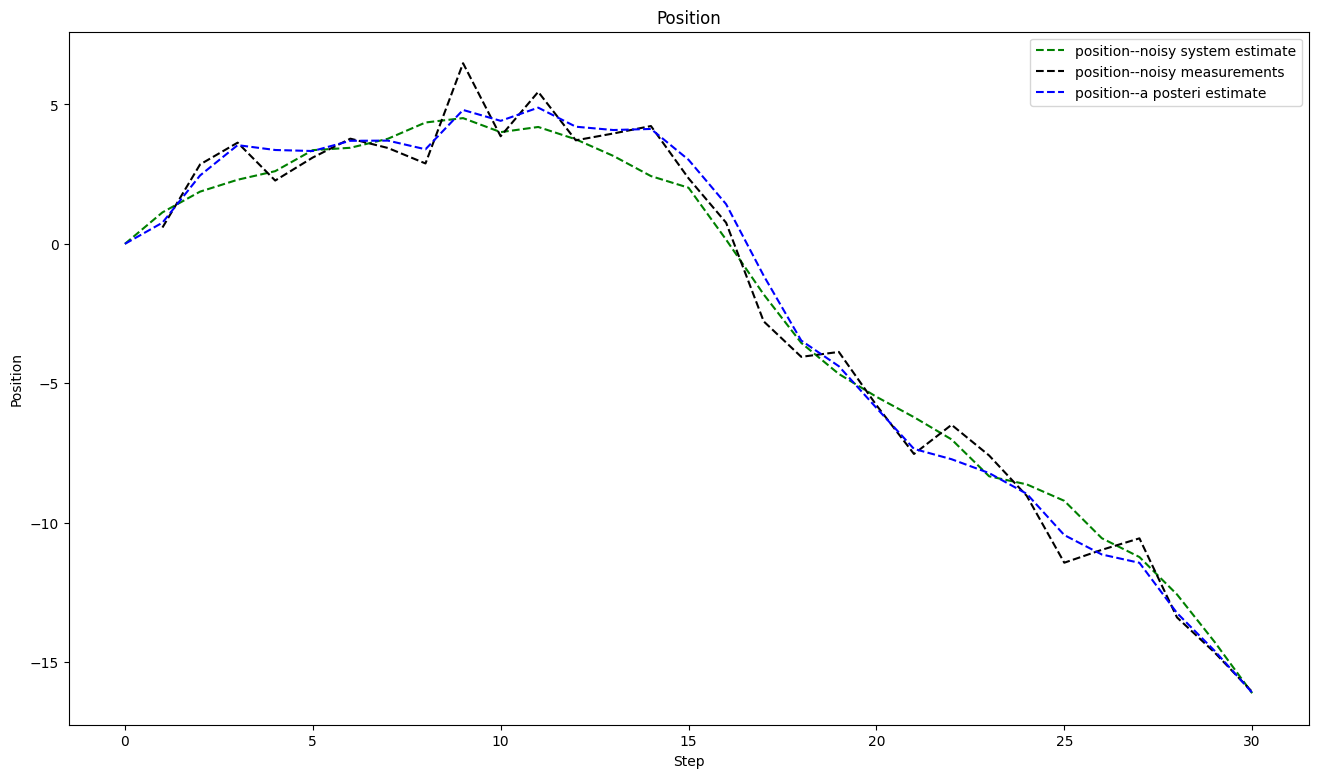

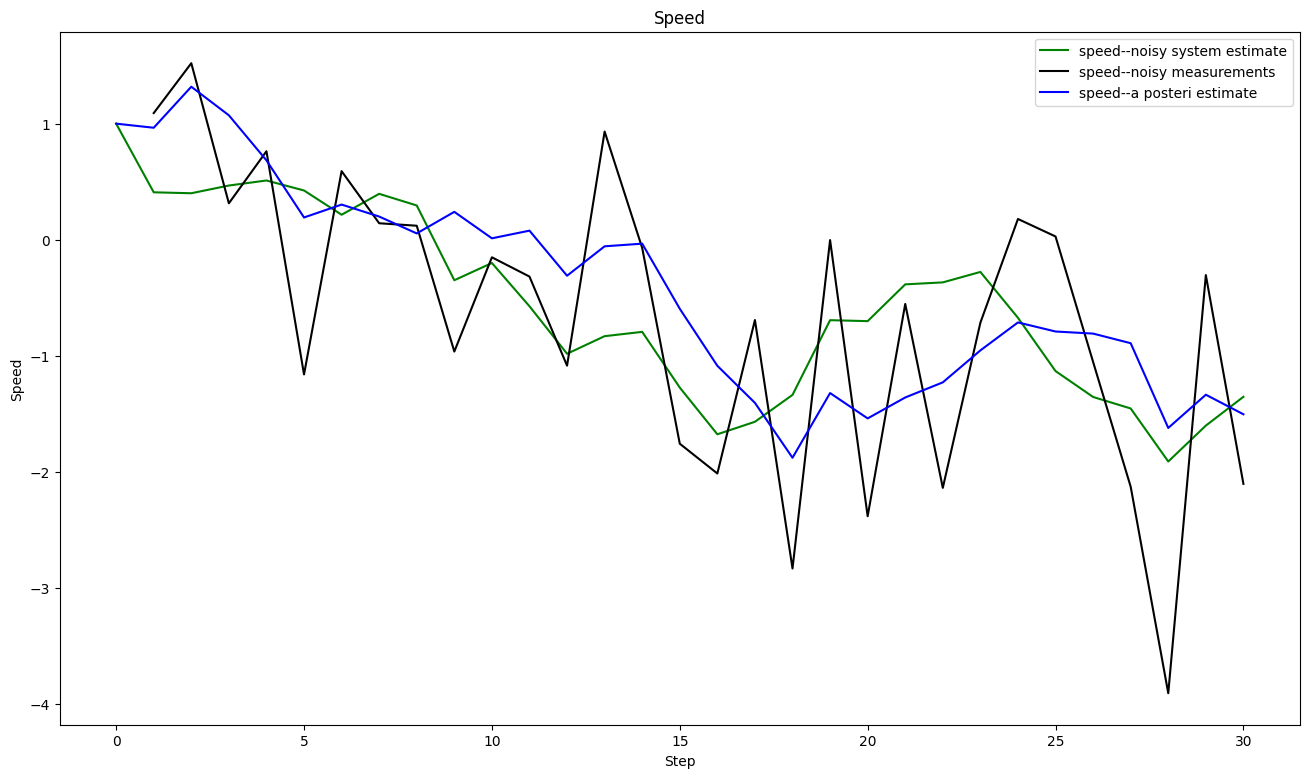

In [17]:
plt.figure(figsize=(16, 9))
plt.plot(x[:, 0], 'g--', label='position--noisy system estimate')
plt.plot(z[:, 0], 'k--', label='position--noisy measurements')
plt.plot(x_hat[:, 0], 'b--', label='position--a posteri estimate')
plt.legend()
plt.xlabel('Step')
plt.ylabel('Position')
plt.title('Position')
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(x[:, 1], 'g-', label='speed--noisy system estimate')
plt.plot(z[:, 1], 'k-', label='speed--noisy measurements')
plt.plot(x_hat[:, 1], 'b-', label='speed--a posteri estimate')
plt.legend()
plt.xlabel('Step')
plt.ylabel('Speed')
plt.title('Speed')
plt.show()